In [84]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [92]:
# quickTKMPIRandom = th.Thicket.from_caliperreader(glob('dataFiles/MPI/QuickSort/random/cali/*.cali'))
# quickTKMPISorted = th.Thicket.from_caliperreader(glob('dataFiles/MPI/QuickSort/sorted/cali/*.cali'))
# quickTKMPIReverse = th.Thicket.from_caliperreader(glob('dataFiles/MPI/QuickSort/reverse-sorted/cali/*.cali'))
# quickTKMPIPerturbed = th.Thicket.from_caliperreader(glob('dataFiles/MPI/QuickSort/1%-perturbed/cali/*.cali'))

quickTKCUDARandom = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/QuickSort/random/cali/*.cali'))
quickTKCUDASorted = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/QuickSort/sorted/cali/*.cali'))
quickTKCUDAReverse = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/QuickSort/reverse-sorted/cali/*.cali'))
quickTKCUDAPerturbed = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/QuickSort/1%-perturbed/cali/*.cali'))

In [90]:
quickTKCUDARandom.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,
9631929,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1702089143,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 65536, 1024, 0]",g,quicksort,CUDA,int,4,65536,Random,1024,8,23,online
183652479,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1702089085,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 65536, 128, 0]",g,quicksort,CUDA,int,4,65536,Random,128,1,23,online
194136620,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1702089099,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 65536, 256, 0]",g,quicksort,CUDA,int,4,65536,Random,256,2,23,online
425501472,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1702089020,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 16384, 128, 0]",g,quicksort,CUDA,int,4,16384,Random,128,1,23,online
465333670,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1702088960,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 4096, 128, 0]",g,quicksort,CUDA,int,4,4096,Random,128,1,23,online
610895723,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1702089025,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 16384, 256, 0]",g,quicksort,CUDA,int,4,16384,Random,256,2,23,online
649394870,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1702088871,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 1024, 64, 0]",g,quicksort,CUDA,int,4,1024,Random,64,0,23,online
733031852,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1702089271,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 262144, 64, 0]",g,quicksort,CUDA,int,4,262144,Random,64,0,23,online
756016250,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,1702088980,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./quicksort_cuda, 4096, 512, 0]",g,quicksort,CUDA,int,4,4096,Random,512,4,23,online


In [93]:
# quickMPIData = [quickTKMPIRandom, quickTKMPISorted, quickTKMPIReverse, quickTKMPIPerturbed]
# quickMPIDataClean = []

# for i in range(len(quickMPIData)):
#     quickGB = quickMPIData[i].groupby("InputSize")

#     quickCtk = th.Thicket.concat_thickets(
#         thickets=list(quickGB.values()),
#         headers=list(quickGB.keys()),
#         axis="columns",
#         metadata_key="num_procs"
#     )

#     remove_list = [("node", "")]
#     values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
#     for val in values:
#         remove_list.append((val, "nid"))
#         remove_list.append((val, "spot.channel"))
#         remove_list.append((val, "Total time"))

#     quickCtk.dataframe = quickCtk.dataframe.reset_index().drop(remove_list, axis=1)
#     quickMPIDataClean.append(quickCtk)

quickCUDAData = [quickTKCUDARandom, quickTKCUDASorted, quickTKCUDAReverse, quickTKCUDAPerturbed]
quickCUDADataClean = []

for i in range(len(quickCUDAData)):
    quickGB = quickCUDAData[i].groupby("InputSize")
    quickCtk = th.Thicket.concat_thickets(
        thickets=list(quickGB.values()),
        headers=list(quickGB.keys()),
        axis="columns",
        metadata_key="num_threads"
    )

    remove_list = [("node", "")]
    values = [2**16]
    for val in values:
        remove_list.append((val, "nid"))
        remove_list.append((val, "spot.channel"))
        remove_list.append((val, "Total time"))

    quickCtk.dataframe = quickCtk.dataframe.reset_index().drop(remove_list, axis=1)
    quickCUDADataClean.append(quickCtk)

5  thickets created...
{1024: <thicket.thicket.Thicket object at 0x17d51e350>, 4096: <thicket.thicket.Thicket object at 0x16a489150>, 16384: <thicket.thicket.Thicket object at 0x293ebf8d0>, 65536: <thicket.thicket.Thicket object at 0x293df97d0>, 262144: <thicket.thicket.Thicket object at 0x293ea6610>}
4  thickets created...
{1024: <thicket.thicket.Thicket object at 0x293eb7350>, 4096: <thicket.thicket.Thicket object at 0x293ce9810>, 16384: <thicket.thicket.Thicket object at 0x293e296d0>, 65536: <thicket.thicket.Thicket object at 0x29031d8d0>}
4  thickets created...
{1024: <thicket.thicket.Thicket object at 0x293ca9bd0>, 4096: <thicket.thicket.Thicket object at 0x2942cb110>, 16384: <thicket.thicket.Thicket object at 0x293094210>, 65536: <thicket.thicket.Thicket object at 0x293c33150>}
5  thickets created...
{1024: <thicket.thicket.Thicket object at 0x293f48410>, 4096: <thicket.thicket.Thicket object at 0x2940e3610>, 16384: <thicket.thicket.Thicket object at 0x293ea8910>, 65536: <thicket

Collect desired regions for plotting

In [95]:
# Data for main
# quickMPIRandomMain = quickMPIDataClean[0].dataframe.loc[quickMPIDataClean[0].dataframe['name'] == 'main']
# quickMPISortedMain = quickMPIDataClean[1].dataframe.loc[quickMPIDataClean[1].dataframe['name'] == 'main']
# quickMPIReverseMain = quickMPIDataClean[2].dataframe.loc[quickMPIDataClean[2].dataframe['name'] == 'main']
# quickMPIPerturbedMain = quickMPIDataClean[3].dataframe.loc[ quickMPIDataClean[3].dataframe['name'] == 'main']

# # Data for comm
# quickMPIRandomComm = quickMPIDataClean[0].dataframe.loc[quickMPIDataClean[0].dataframe['name'] == 'comm']
# quickMPISortedComm = quickMPIDataClean[1].dataframe.loc[quickMPIDataClean[1].dataframe['name'] == 'comm']
# quickMPIReverseComm = quickMPIDataClean[2].dataframe.loc[quickMPIDataClean[2].dataframe['name'] == 'comm']
# quickMPIPerturbedComm = quickMPIDataClean[3].dataframe.loc[ quickMPIDataClean[3].dataframe['name'] == 'comm']

# # Data for comp
# quickMPIRandomComp = quickMPIDataClean[0].dataframe.loc[quickMPIDataClean[0].dataframe['name'] == 'comp_large']
# quickMPISortedComp = quickMPIDataClean[1].dataframe.loc[quickMPIDataClean[1].dataframe['name'] == 'comp_large']
# quickMPIReverseComp = quickMPIDataClean[2].dataframe.loc[quickMPIDataClean[2].dataframe['name'] == 'comp_large']
# quickMPIPerturbedComp = quickMPIDataClean[3].dataframe.loc[quickMPIDataClean[3].dataframe['name'] == 'comp_large']

# algosMain = {'quickMPIRandom': quickMPIRandomMain, 'quickMPISorted': quickMPISortedMain, 'quickMPIReverse': quickMPIReverseMain,
#             'quickMPIPerturbed': quickMPIPerturbedMain}

# algosComm = {'quickMPIRandom': quickMPIRandomComm, 'quickMPISorted': quickMPISortedComm, 'quickMPIReverse': quickMPIReverseComm,
#             'quickMPIPerturbed': quickMPIPerturbedComm}

# algosComp = {'quickMPIRandom': quickMPIRandomComp, 'quickMPISorted': quickMPISortedComp, 'quickMPIReverse': quickMPIReverseComp,
#             'quickMPIPerturbed': quickMPIPerturbedComp}

# Data for main
quickCUDARandomMain = quickCUDADataClean[0].dataframe.loc[quickCUDADataClean[0].dataframe['name'] == 'main']
quickCUDASortedMain = quickCUDADataClean[1].dataframe.loc[quickCUDADataClean[1].dataframe['name'] == 'main']
quickCUDAReverseMain = quickCUDADataClean[2].dataframe.loc[quickCUDADataClean[2].dataframe['name'] == 'main']
quickCUDAPerturbedMain = quickCUDADataClean[3].dataframe.loc[quickCUDADataClean[3].dataframe['name'] == 'main']

# Data for comm
quickCUDARandomComm = quickCUDADataClean[0].dataframe.loc[quickCUDADataClean[0].dataframe['name'] == 'comm']
quickCUDASortedComm = quickCUDADataClean[1].dataframe.loc[quickCUDADataClean[1].dataframe['name'] == 'comm']
quickCUDAReverseComm = quickCUDADataClean[2].dataframe.loc[quickCUDADataClean[2].dataframe['name'] == 'comm']
quickCUDAPerturbedComm = quickCUDADataClean[3].dataframe.loc[quickCUDADataClean[3].dataframe['name'] == 'comm']

# Data for comp
quickCUDARandomComp = quickCUDADataClean[0].dataframe.loc[quickCUDADataClean[0].dataframe['name'] == 'comp_large']
quickCUDASortedComp = quickCUDADataClean[1].dataframe.loc[quickCUDADataClean[1].dataframe['name'] == 'comp_large']
quickCUDAReverseComp = quickCUDADataClean[2].dataframe.loc[quickCUDADataClean[2].dataframe['name'] == 'comp_large']
quickCUDAPerturbedComp = quickCUDADataClean[3].dataframe.loc[quickCUDADataClean[3].dataframe['name'] == 'comp_large']

algosMainCUDA = {'quickCUDARandom': quickCUDARandomMain, 'quickCUDASorted': quickCUDASortedMain, 'quickCUDAReverse': quickCUDAReverseMain, 'quickCUDAPerturbed': quickCUDAPerturbedMain}

algosCommCUDA = {'quickCUDARandom': quickCUDARandomComm, 'quickCUDASorted': quickCUDASortedComm, 'quickCUDAReverse': quickCUDAReverseComm, 'quickCUDAPerturbed': quickCUDAPerturbedComm}

algosCompCUDA = {'quickCUDARandom': quickCUDARandomComp, 'quickCUDASorted': quickCUDASortedComp, 'quickCUDAReverse': quickCUDAReverseComp, 'quickCUDAPerturbed': quickCUDAPerturbedComp}

display(quickCUDADataClean[0].dataframe)

num_threads 1024                                                           \
                nid   spot.channel Min time/rank Max time/rank Avg time/rank   
0           64    1  regionprofile      0.422334      0.422334      0.422334   
1          128    1  regionprofile      0.442856      0.442856      0.442856   
2          256    1  regionprofile      0.449749      0.449749      0.449749   
3          512    1  regionprofile      0.482169      0.482169      0.482169   
4         1024    1  regionprofile      0.471745      0.471745      0.471745   
5           64    3  regionprofile      0.000102      0.000102      0.000102   
6          128    3  regionprofile      0.000089      0.000089      0.000089   
7          256    3  regionprofile      0.000101      0.000101      0.000101   
8          512    3  regionprofile      0.000094      0.000094      0.000094   
9         1024    3  regionprofile      0.000089      0.000089      0.000089   
10          64    4  regionprofile      0.000083      0.000083      0.000083   
11         128    4  regionprofile      0.000069      0.000069      0.000069   
12         256    4  regionprofile      0.000079      0.000079      0.000079   
13         512    4  regionprofile      0.000072      0.000072      0.000072   
14        1024    4  regionprofile      0.000068      0.000068      0.000068   
15          64    5  regionprofile      0.000051      0.000051      0.000051   
16         128    5  regionprofile      0.000054      0.000054      0.000054   
17         256    5  regionprofile      0.000054      0.000054      0.000054   
18         512    5  regionprofile      0.000056      0.000056      0.000056   
19        1024    5  regionprofile      0.000052      0.000052      0.000052   
20          64    6  regionprofile      0.000056      0.000056      0.000056   
21         128    6  regionprofile      0.001550      0.001550      0.001550   
22         256    6  regionprofile      0.001536      0.001536      0.001536   
23         512    6  regionprofile      0.001591      0.001591      0.001591   
24        1024    6  regionprofile      0.001553      0.001553      0.001553   
25          64    7  regionprofile      0.000047      0.000047      0.000047   
26         128    7  regionprofile      0.001536      0.001536      0.001536   
27         256    7  regionprofile      0.001523      0.001523      0.001523   
28         512    7  regionprofile      0.001576      0.001576      0.001576   
29        1024    7  regionprofile      0.001539      0.001539      0.001539   
30          64    8  regionprofile      0.000005      0.000005      0.000005   
31         128    8  regionprofile      0.000009      0.000009      0.000009   
32         256    8  regionprofile      0.000006      0.000006      0.000006   
33         512    8  regionprofile      0.000011      0.000011      0.000011   
34        1024    8  regionprofile      0.000009      0.000009      0.000009   
35          64    2  regionprofile      0.000139      0.000139      0.000139   
36         128    2  regionprofile      0.000137      0.000137      0.000137   
37         256    2  regionprofile      0.000135      0.000135      0.000135   
38         512    2  regionprofile      0.000147      0.000147      0.000147   
39        1024    2  regionprofile      0.000142      0.000142      0.000142   

              4096                                                           \
   Total time  nid   spot.channel Min time/rank Max time/rank Avg time/rank   
0    0.422334    1  regionprofile      0.431641      0.431641      0.431641   
1    0.442856    1  regionprofile      0.444336      0.444336      0.444336   
2    0.449749    1  regionprofile      0.709337      0.709337      0.709337   
3    0.482169    1  regionprofile      0.791469      0.791469      0.791469   
4    0.471745    1  regionprofile      0.882725      0.882725      0.882725   
5    0.000102    3  regionprofile      0.000092      0.000092      0.000092   
6    0.000

Plot strong scaling

In [61]:
def plot_strong_scaling(algos, num_vals, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    for k in algos.keys():
        dframe = algos[k]
        xvals = dframe['num_procs']
        yvals = dframe[num_vals][time_type]
        ax.plot(xvals, yvals, label=k)
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

MPI

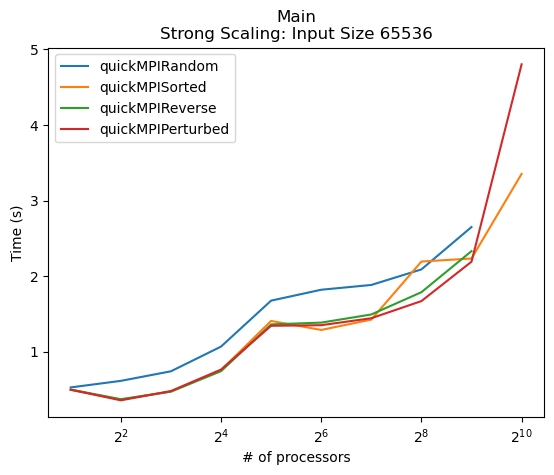

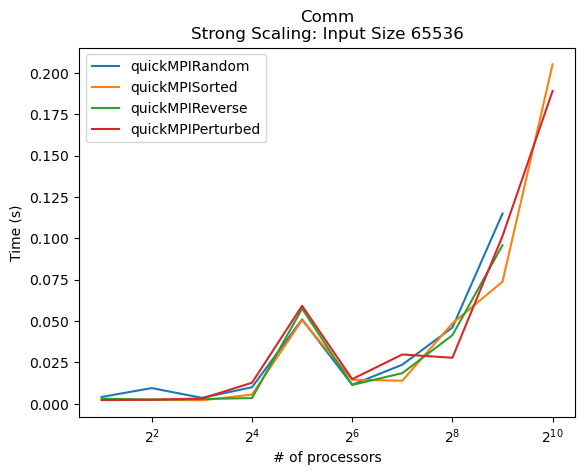

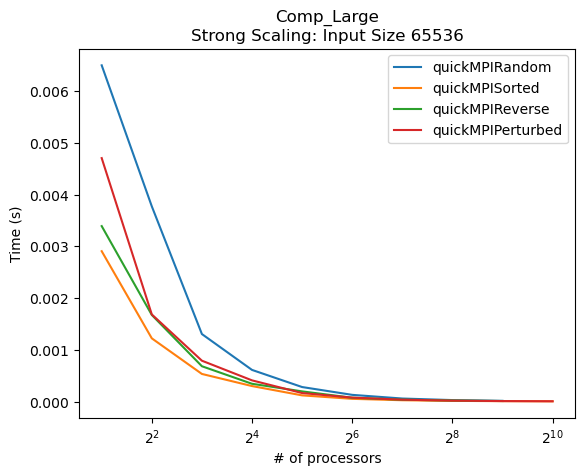

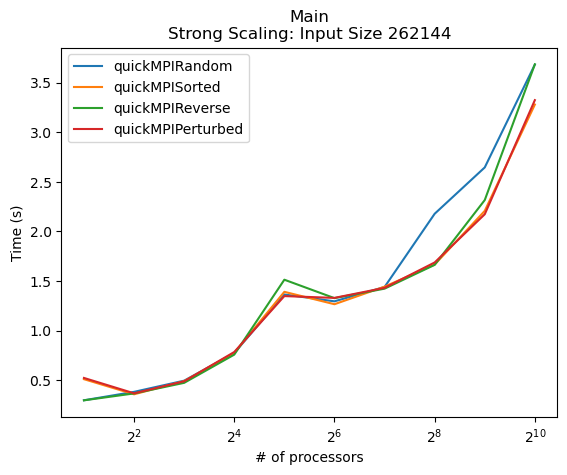

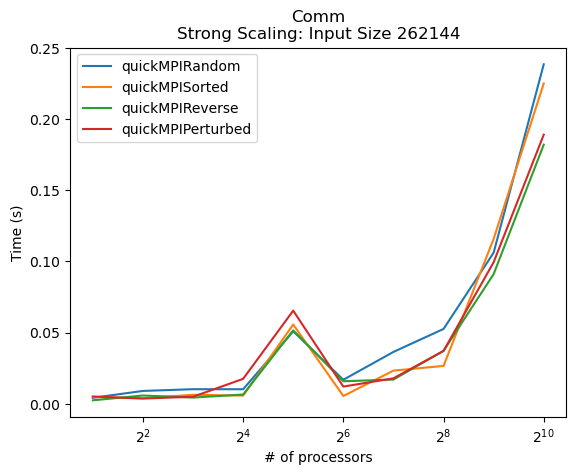

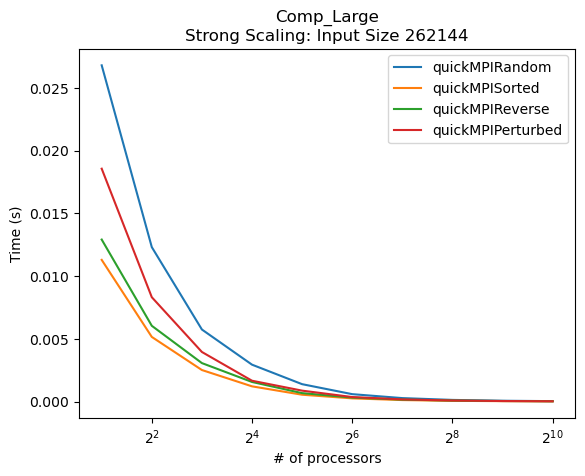

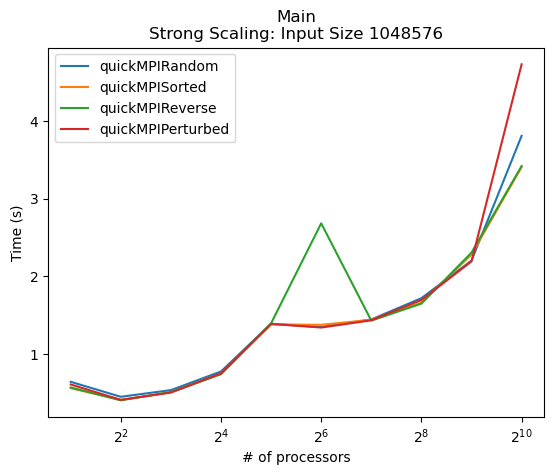

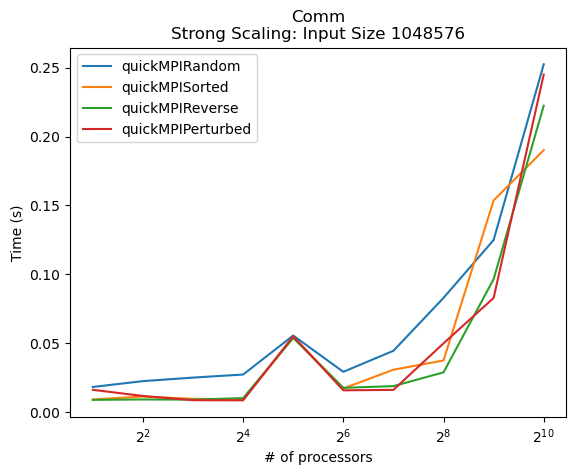

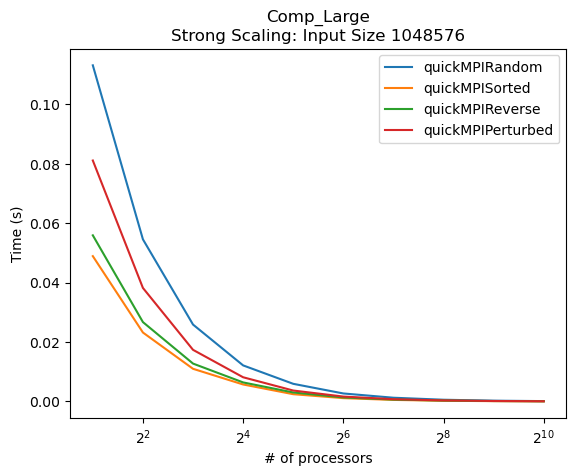

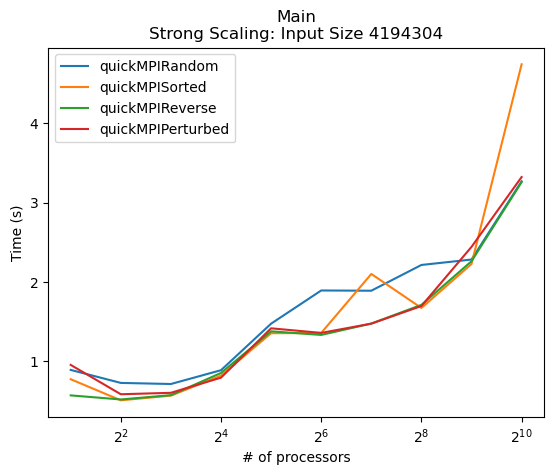

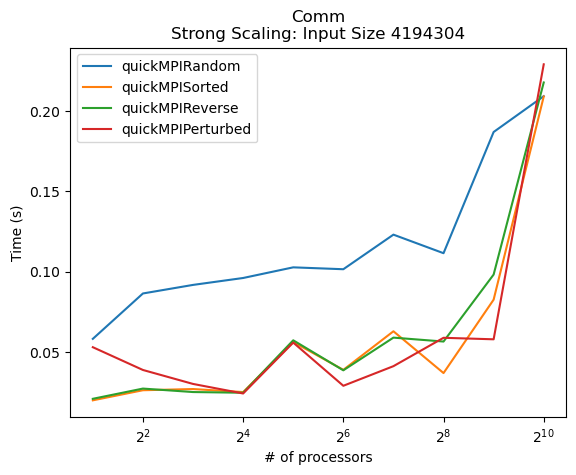

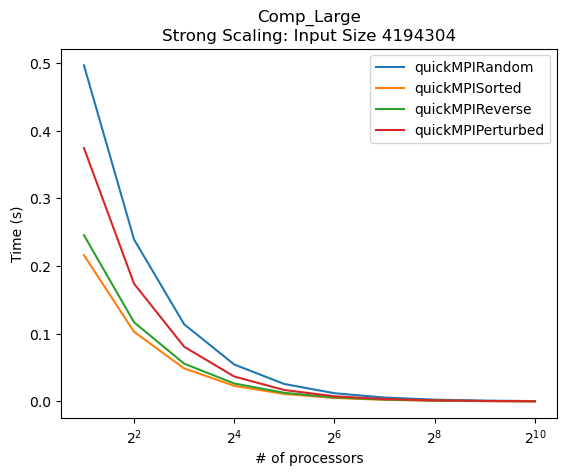

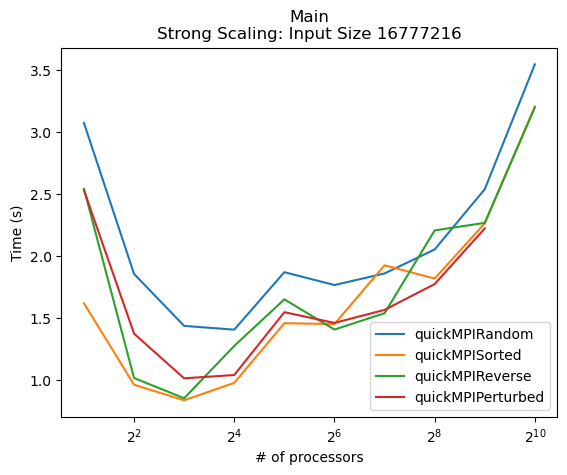

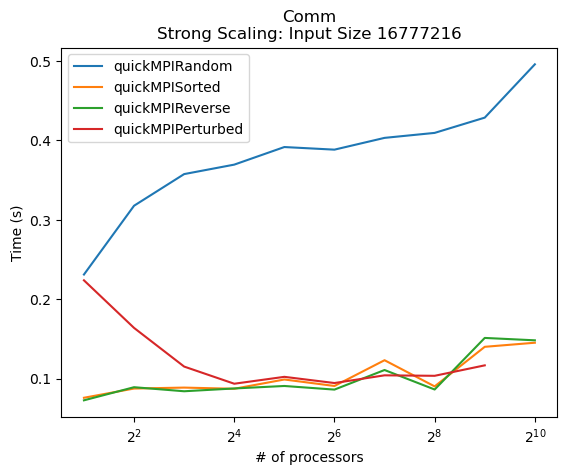

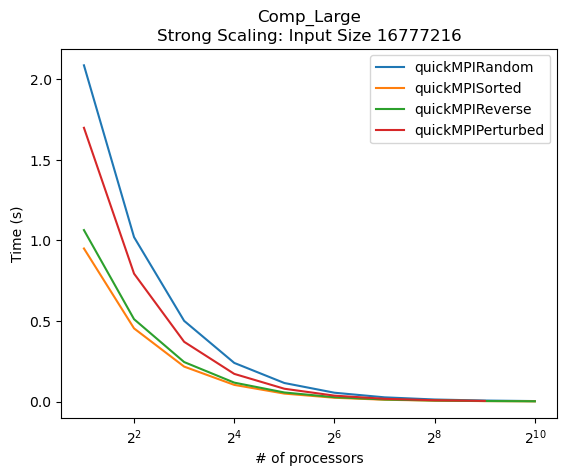

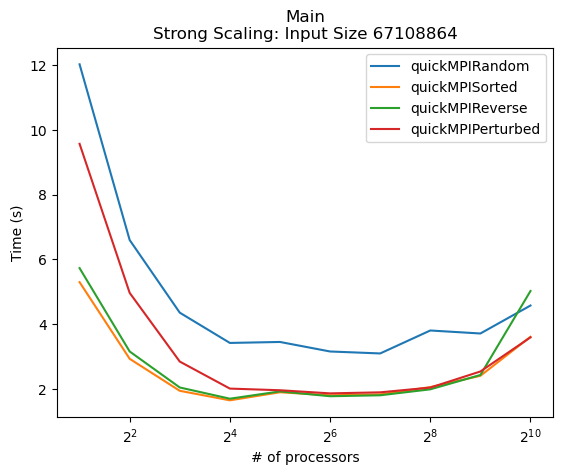

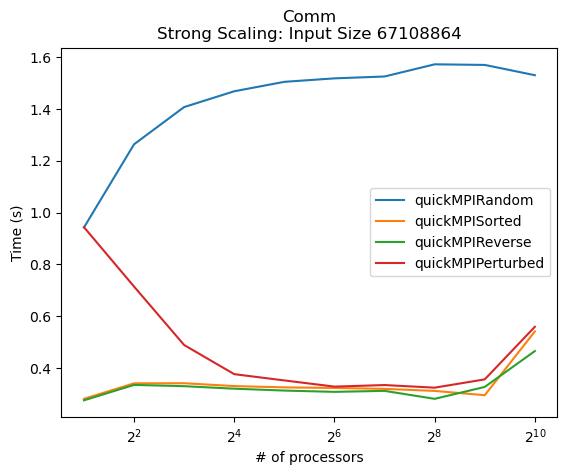

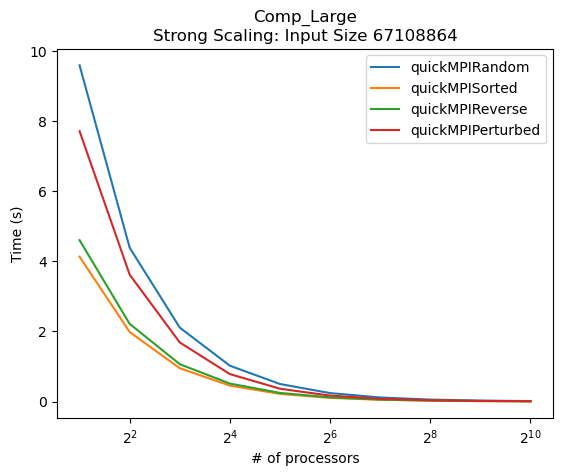

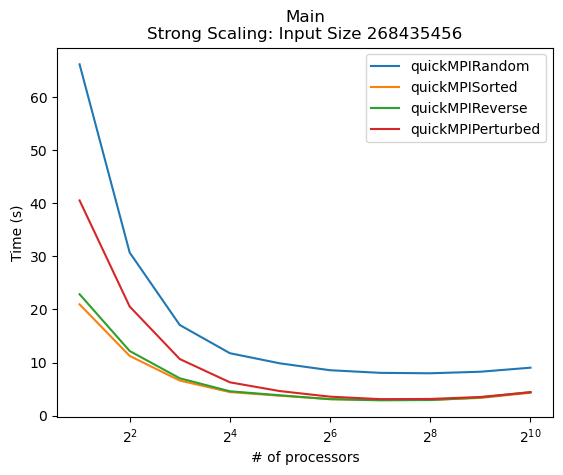

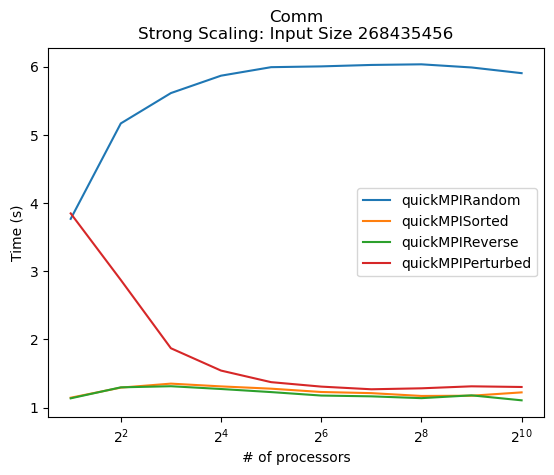

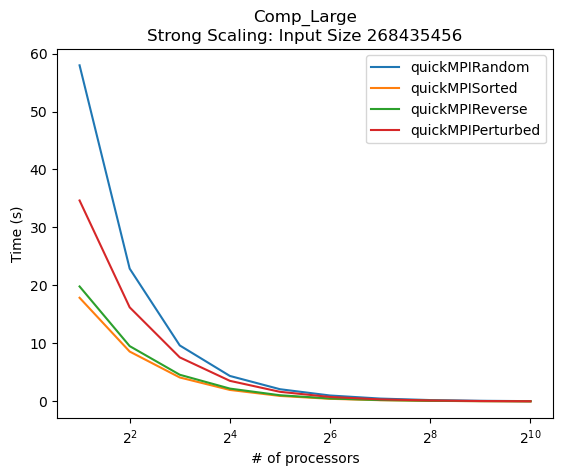

In [41]:
values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]

for val in values:
    plot_strong_scaling(algosMain, val, 'Avg time/rank', 'Main\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)')
    plot_strong_scaling(algosComm, val, 'Avg time/rank', 'Comm\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)')
    plot_strong_scaling(algosComp, val, 'Avg time/rank', 'Comp_Large\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)')

CUDA

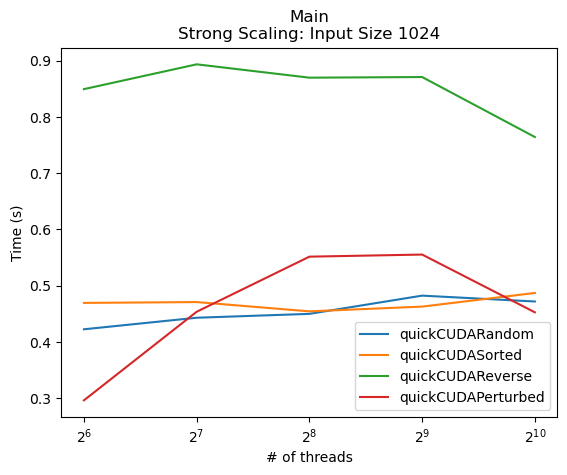

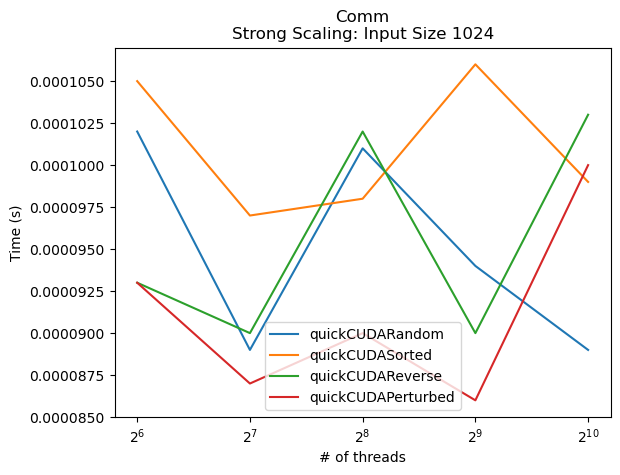

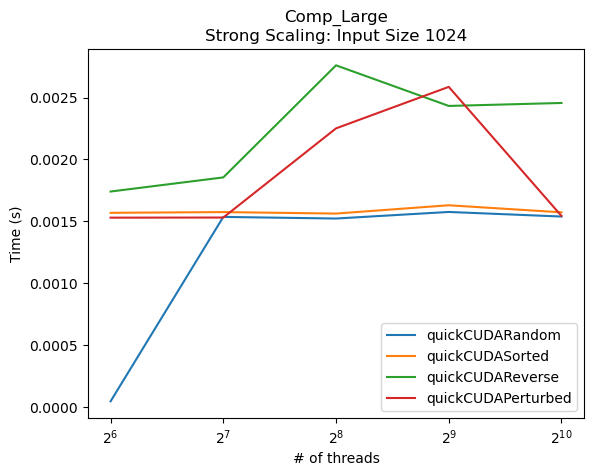

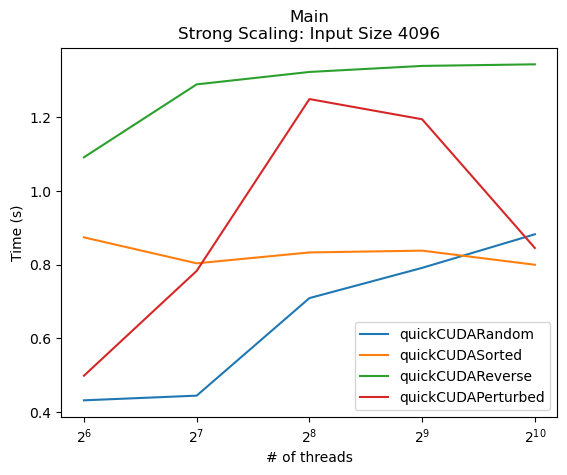

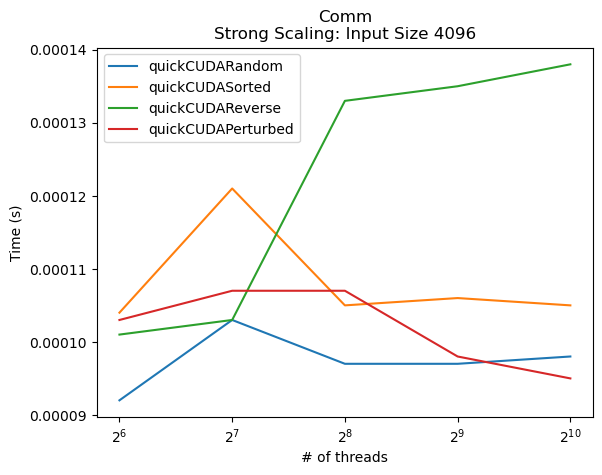

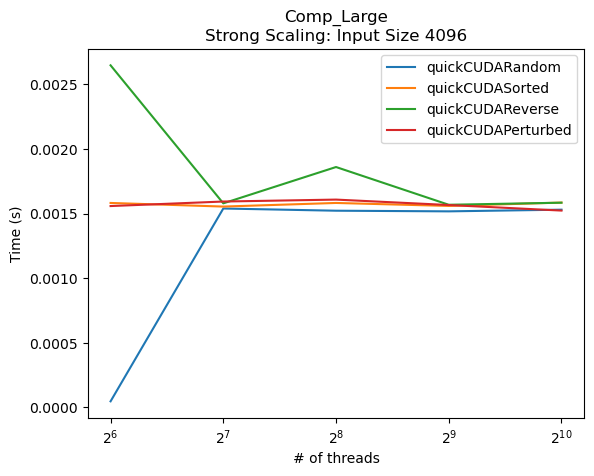

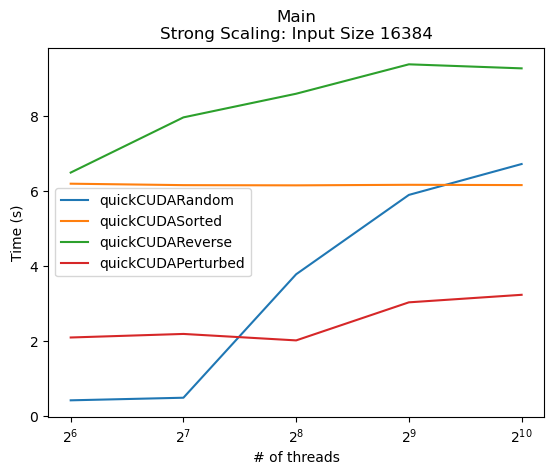

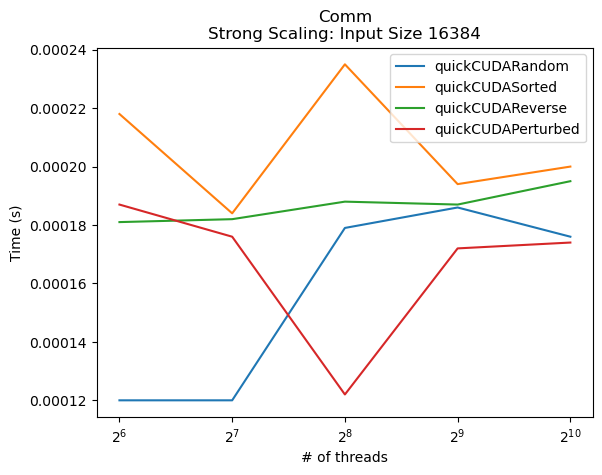

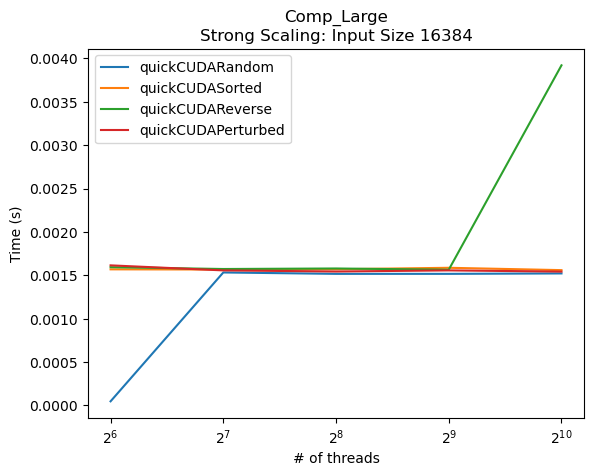

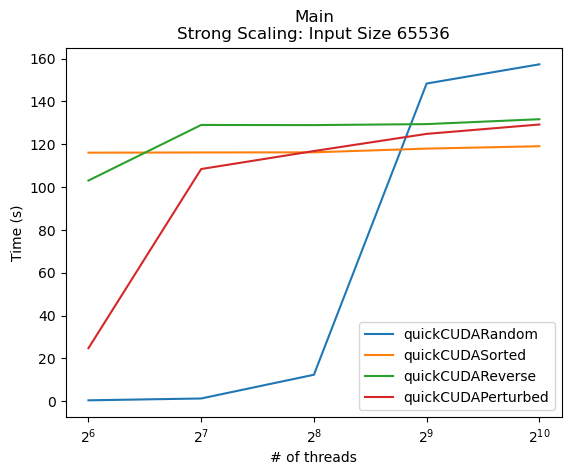

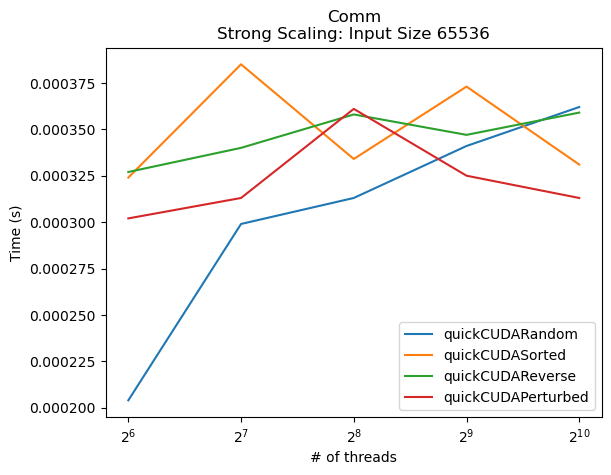

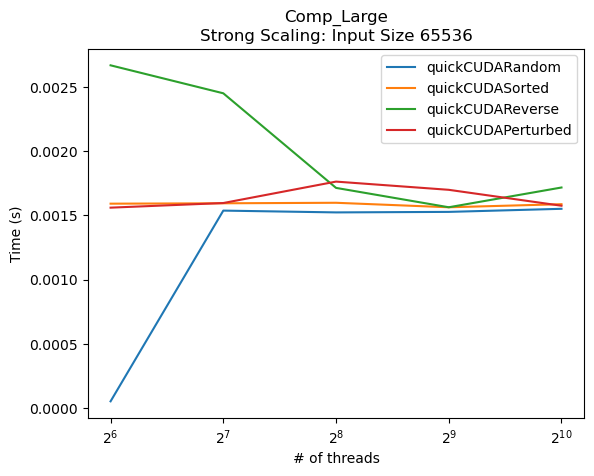

In [97]:
def plot_strong_scaling(algos, num_vals, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    for k in algos.keys():
        dframe = algos[k]
        xvals = dframe['num_threads']
        yvals = dframe[num_vals][time_type]
        ax.plot(xvals, yvals, label=k)
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

values = [2**10, 2**12, 2**14, 2**16]
for val in values:
    plot_strong_scaling(algosMainCUDA, val, 'Avg time/rank', 'Main\nStrong Scaling: Input Size ' + str(val), '# of threads', 'Time (s)')
    plot_strong_scaling(algosCommCUDA, val, 'Avg time/rank', 'Comm\nStrong Scaling: Input Size ' + str(val), '# of threads', 'Time (s)')
    plot_strong_scaling(algosCompCUDA, val, 'Avg time/rank', 'Comp_Large\nStrong Scaling: Input Size ' + str(val), '# of threads', 'Time (s)')

Plot strong scaling speedup

In [50]:
def plot_strong_scaling_speedup(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = algo['num_procs']
    
    for val in values:
        vals_list = list(algo[val][time_type])
        yvals = [vals_list[0] / currVal for currVal in vals_list]
        ax.plot(xvals, yvals, label=str(val))
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

MPI

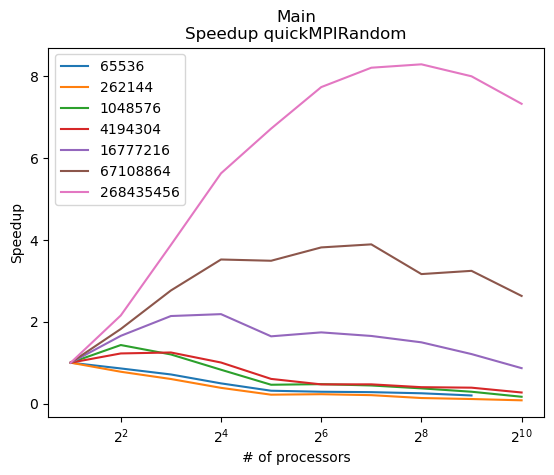

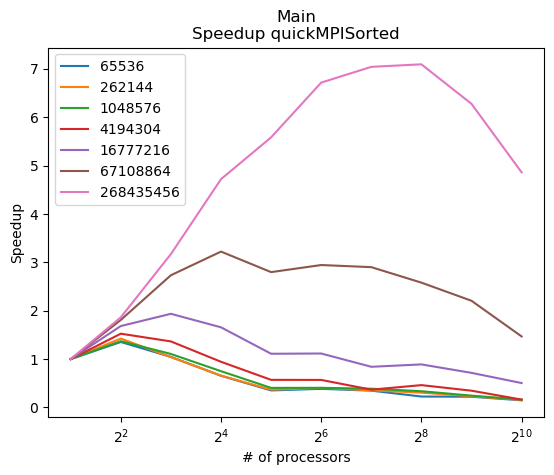

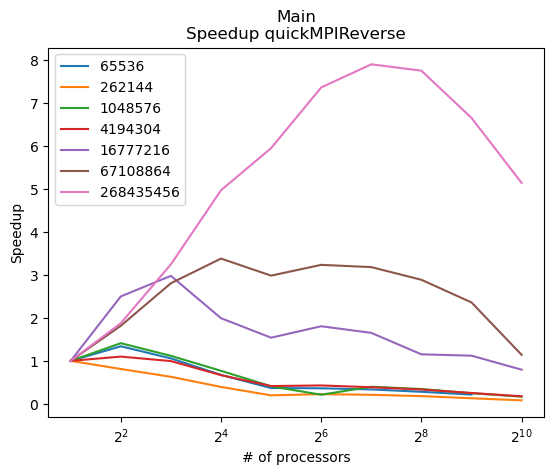

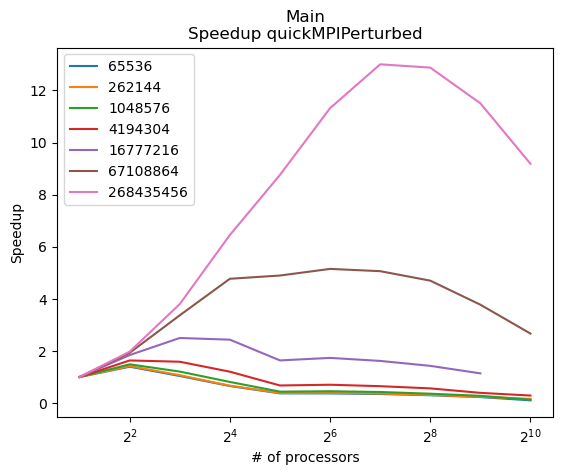

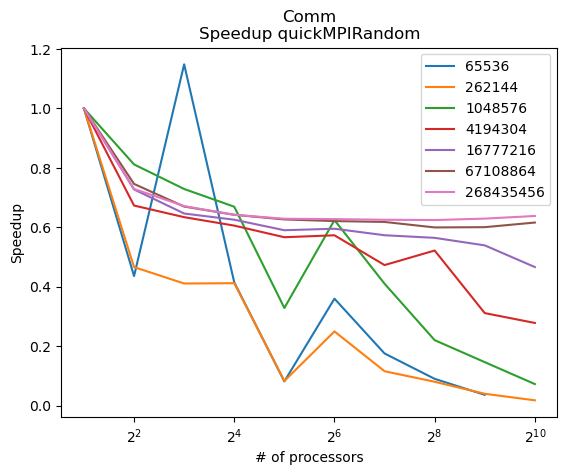

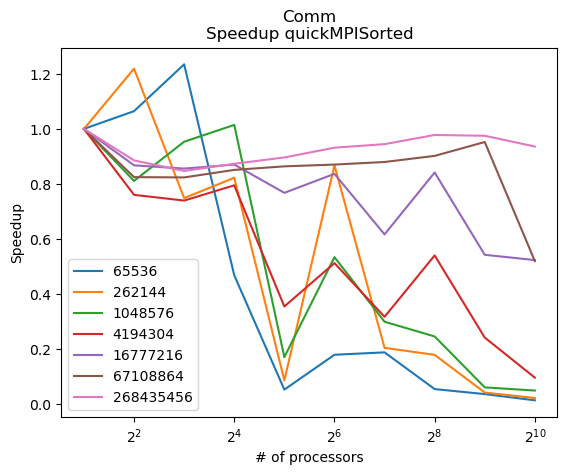

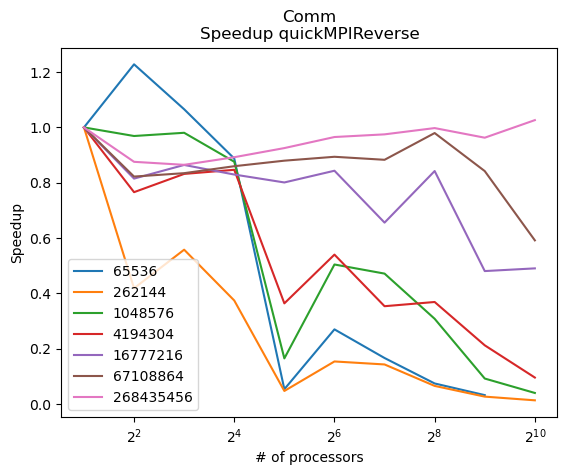

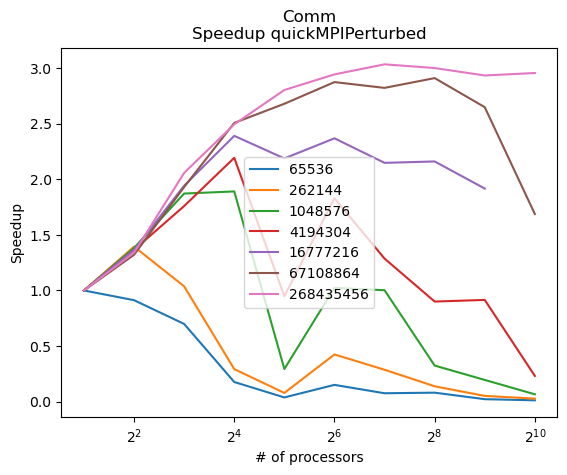

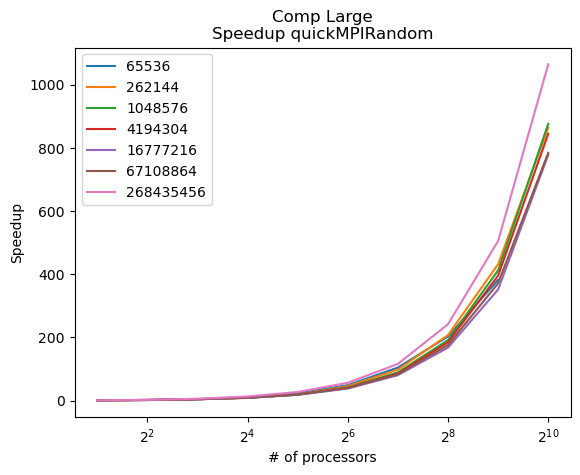

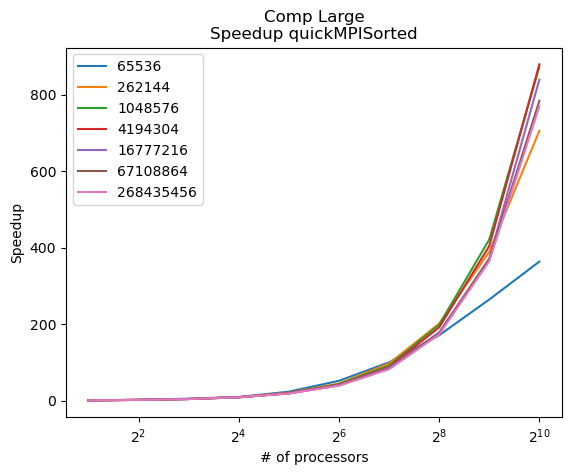

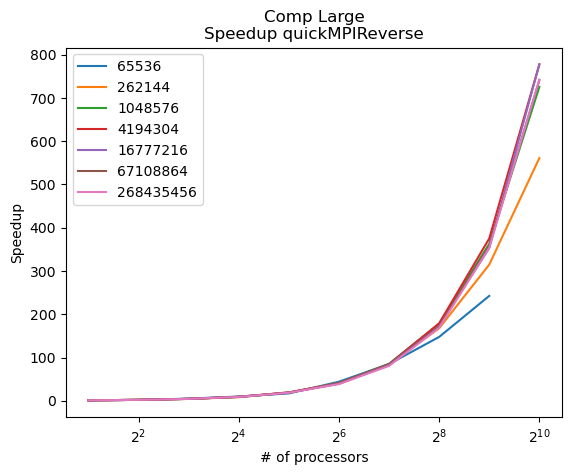

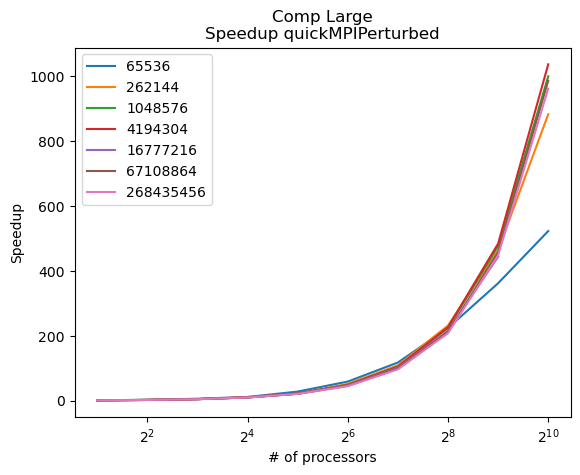

In [54]:
values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
for key in algosMain.keys():
    plot_strong_scaling_speedup(key, algosMain[key], values, 'Avg time/rank', 'Main\nSpeedup ' + key, '# of processors', 'Speedup')
    
for key in algosComm.keys():
    plot_strong_scaling_speedup(key, algosComm[key], values, 'Avg time/rank', 'Comm\nSpeedup ' + key, '# of processors', 'Speedup')
    
for key in algosComp.keys():
    plot_strong_scaling_speedup(key, algosComp[key], values, 'Avg time/rank', 'Comp Large\nSpeedup ' + key, '# of processors', 'Speedup')

CUDA

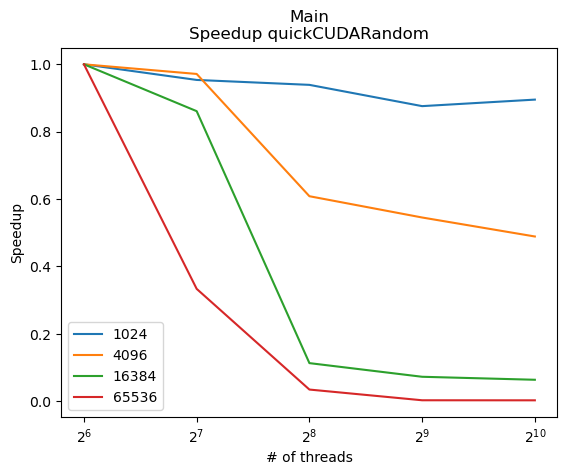

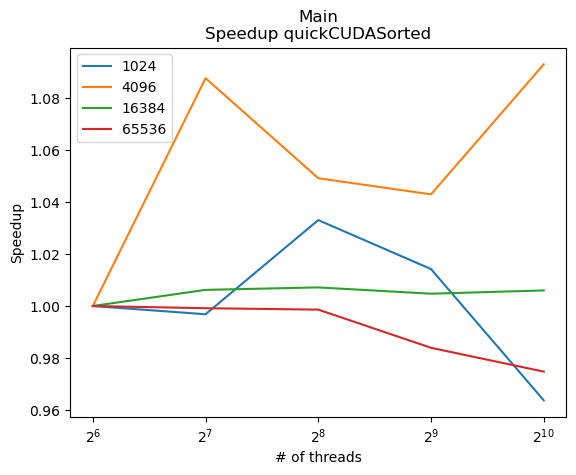

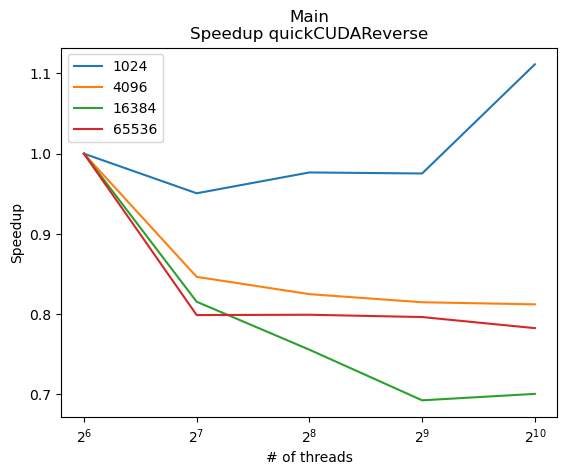

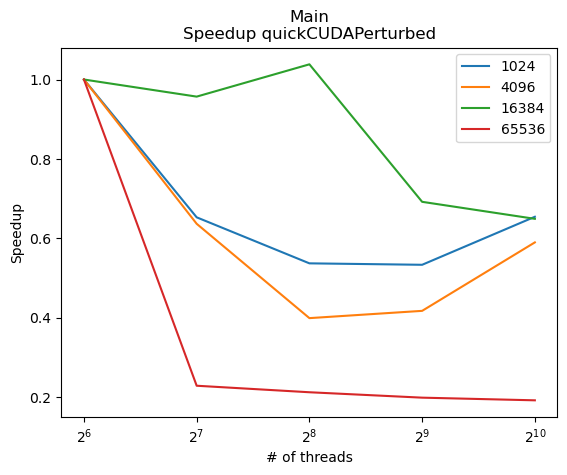

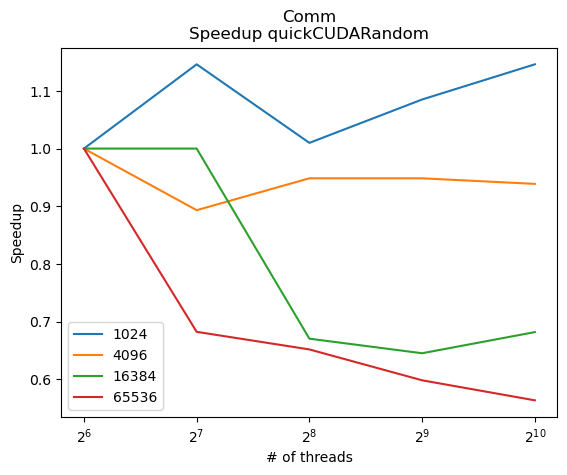

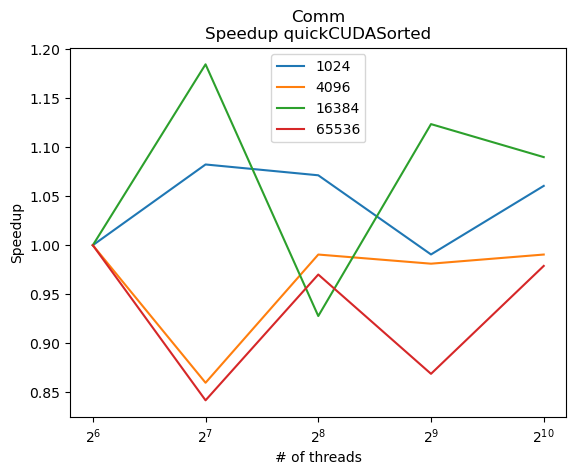

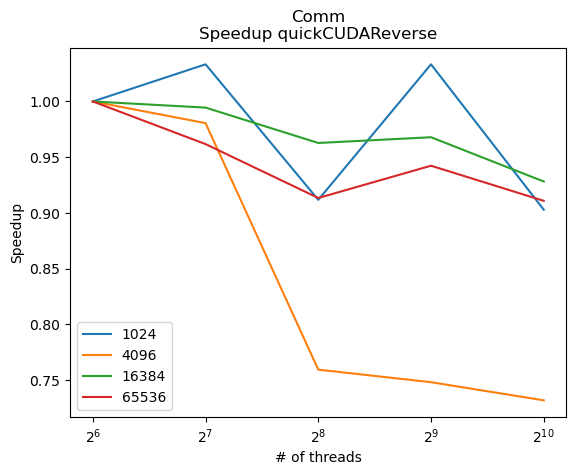

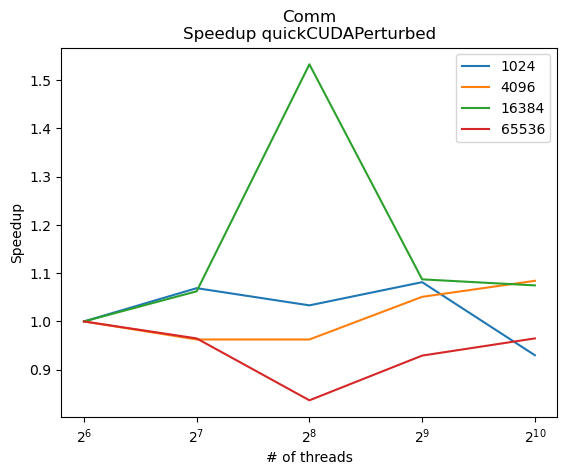

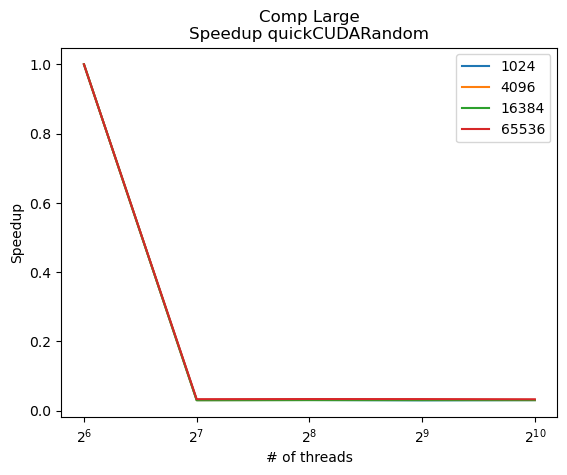

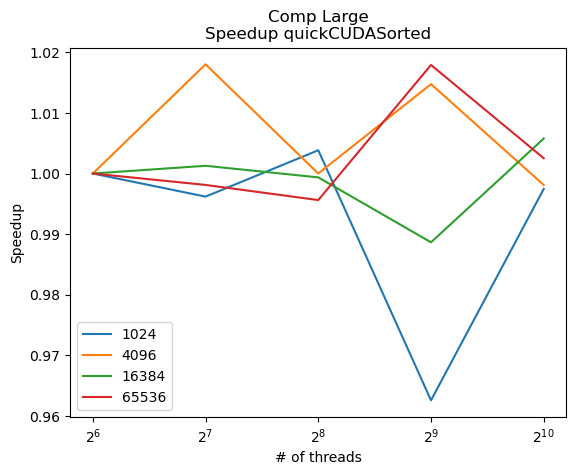

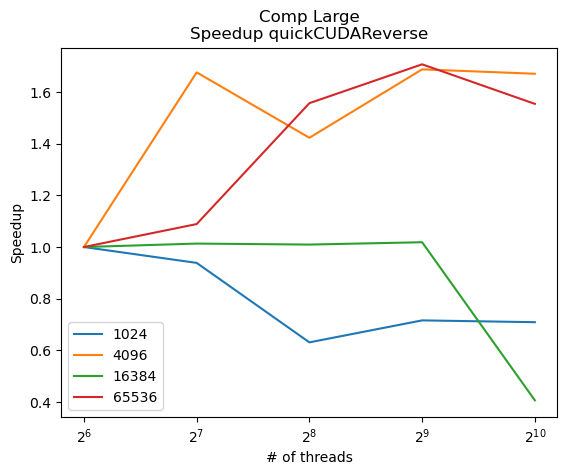

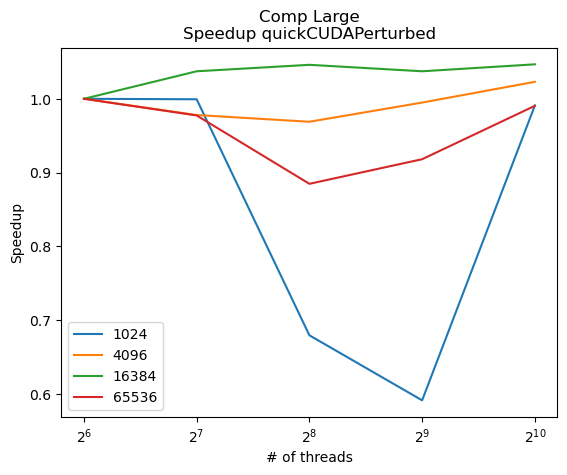

In [98]:
def plot_strong_scaling_speedup(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = algo['num_threads']
    
    for val in values:
        vals_list = list(algo[val][time_type])
        yvals = [vals_list[0] / currVal for currVal in vals_list]
        ax.plot(xvals, yvals, label=str(val))
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

for key in algosMainCUDA.keys():
    plot_strong_scaling_speedup(key, algosMainCUDA[key], values, 'Avg time/rank', 'Main\nSpeedup ' + key, '# of threads', 'Speedup')
    
for key in algosCommCUDA.keys():
    plot_strong_scaling_speedup(key, algosCommCUDA[key], values, 'Avg time/rank', 'Comm\nSpeedup ' + key, '# of threads', 'Speedup')
    
for key in algosCompCUDA.keys():
    plot_strong_scaling_speedup(key, algosCompCUDA[key], values, 'Avg time/rank', 'Comp Large\nSpeedup ' + key, '# of threads', 'Speedup')

Plot weak scaling

In [102]:
def plot_weak_scaling(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = [2, 8, 32, 128, 512]
    sizePerXVal = [2**20, 2**22, 2**24, 2**26, 2**28]
    yvals = []
    for idx, val in enumerate(sizePerXVal):
        correctNumProcs = algo.loc[algo['num_procs'] == xvals[idx]]
        times = correctNumProcs[val][time_type]
        yvals.append(float(times.iloc[0]))
    
    ax.plot(xvals, yvals, label = algoname)
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

def plot_weak_scaling_CUDA(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1,1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = [128, 256, 512, 1024]
    sizePerXVal = [2**10, 2**12, 2**14, 2**16]
    yvals = []
    for idx, val in enumerate(sizePerXVal):
        correctNumProcs = algo.loc[algo['num_threads'] == xvals[idx]]
        times = correctNumProcs[val][time_type]
        yvals.append(float(times.iloc[0]))
    
    ax.plot(xvals, yvals, label = algoname)
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

MPI

In [ ]:
for key in algosMain.keys():
    plot_weak_scaling(key, algosMain[key], values, 'Avg time/rank', 'Main\nWeak Scaling ' + key, '# of processors', 'Time (s)')

for key in algosComm.keys():
    plot_weak_scaling(key, algosComm[key], values, 'Avg time/rank', 'Comm\nWeak Scaling ' + key, '# of processors', 'Time (s)')

for key in algosComp.keys():
    plot_weak_scaling(key, algosComp[key], values, 'Avg time/rank', 'Comp Large\nWeak Scaling ' + key, '# of processors', 'Time (s)')

CUDA

ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

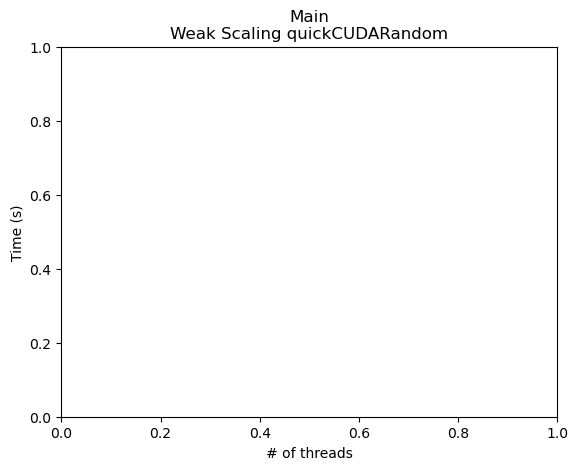

In [104]:
for key in algosMainCUDA.keys():
    plot_weak_scaling_CUDA(key, algosMainCUDA[key], values, 'Avg time/rank', 'Main\nWeak Scaling ' + key, '# of threads', 'Time (s)')

for key in algosCommCUDA.keys():
    plot_weak_scaling_CUDA(key, algosCommCUDA[key], values, 'Avg time/rank', 'Comm\nWeak Scaling ' + key, '# of threads', 'Time (s)')

for key in algosCompCUDA.keys():
    plot_weak_scaling_CUDA(key, algosCompCUDA[key], values, 'Avg time/rank', 'Comp Large\nWeak Scaling ' + key, '# of threads', 'Time (s)')